In [1]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import subprocess
import os
%matplotlib inline

# Pathfinder Swerve Path Visualization
This uses our Java robot code and the [Pathfinder](https://github.com/JacisNonsense/Pathfinder) library to output trajectory points to a `.csv` file we use to plot.

The velocity and headings for each segment is transformed into a `forward` and `strafe` input to the swerve drive.

Parameters are:

- `dt` = iteration time, loop period (ms)
- `v_max` = max velocity (ft/sec)
- `a_max` = max acceleration (ft/sec/sec)
- `j_max` = max jerk (ft/sec/sec/sec)
- `waypoints` = x, y, and exit angle (degrees) 


In [2]:
# constant for all examples
dt     = 50         # ms
v_max  = 16         # ft/sec
a_max  = 64         # ft/sec/sec
j_max  = a_max * 10 # ft/sec/sec/sec

## Drive forward down field

In [3]:
# drive forward down field
waypoints = [
    {"x": 0, "y": 0, "degrees": 0},
    {"x": 1, "y": 0, "degrees": 0},
]

In [4]:
motion_input = {"pathfinder":{"dt":dt, "v_max": v_max, "a_max": a_max, "j_max": j_max, "waypoints": waypoints}}
process = subprocess.run("MOTION_OPTS=-Djava.library.path=../build/install/motion/lib ../build/install/motion/bin/motion '{}'".format(json.dumps(motion_input)), shell=True)
df = pd.read_csv("trajectory.csv", index_col="time")

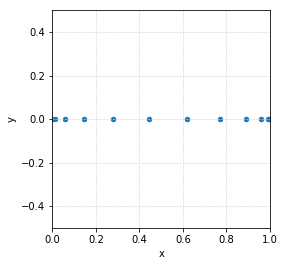

In [5]:
ax = df.plot.scatter('x', 'y')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)
ax.set_ylim([-0.5, 0.5])
ax.set_xlim([0, 1])
ax.set_aspect('equal')

In [6]:
df['heading_deg'] = df['heading_rad'].apply(math.degrees)
df['velocity_normalized'] = df['velocity'] / df['velocity'].max()
df['forward'] = df['heading_rad'].apply(math.cos) * df['velocity_normalized']
df['strafe'] = -df['heading_rad'].apply(math.sin) * df['velocity_normalized']
df[['heading_deg', 'velocity', 'velocity_normalized', 'forward', 'strafe']]

,heading_deg,velocity,velocity_normalized,forward,strafe
time,,,,,
0.0,0.0,0.000000,0.000000,0.000000,-0.0
50.0,0.0,1.454959,0.125000,0.125000,-0.0
100.0,0.0,4.364877,0.375000,0.375000,-0.0
150.0,0.0,7.274795,0.625000,0.625000,-0.0
200.0,0.0,10.184713,0.875000,0.875000,-0.0
250.0,0.0,11.639672,1.000000,1.000000,-0.0
300.0,0.0,11.112100,0.954675,0.954675,-0.0
350.0,0.0,9.129569,0.784349,0.784349,-0.0
400.0,0.0,6.219651,0.534349,0.534349,-0.0


## Drive at 60 deg relative to field

In [7]:
degrees = 60
waypoints = [
    {"x": 0, "y": 0, "degrees": degrees},
    {"x": math.cos(math.radians(degrees)), "y": math.sin(math.radians(degrees)), "degrees": degrees},
]

In [8]:
motion_input = {"pathfinder":{"dt":dt, "v_max": v_max, "a_max": a_max, "j_max": j_max, "waypoints": waypoints}}
process = subprocess.run("MOTION_OPTS=-Djava.library.path=../build/install/motion/lib ../build/install/motion/bin/motion '{}'".format(json.dumps(motion_input)), shell=True)
df = pd.read_csv("trajectory.csv", index_col="time")

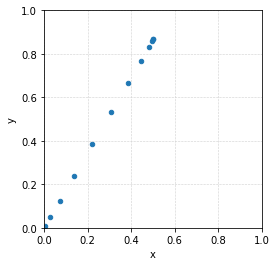

In [9]:
ax = df.plot.scatter('x', 'y')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_aspect('equal')

In [10]:
df['heading_deg'] = df['heading_rad'].apply(math.degrees)
df['velocity_normalized'] = df['velocity'] / df['velocity'].max()
df['forward'] = df['heading_rad'].apply(math.cos) * df['velocity_normalized']
df['strafe'] = -df['heading_rad'].apply(math.sin) * df['velocity_normalized']
df[['heading_deg', 'velocity', 'velocity_normalized', 'forward', 'strafe']]

,heading_deg,velocity,velocity_normalized,forward,strafe
time,,,,,
0.0,0.0,0.000000,0.000000,0.000000,-0.000000
50.0,60.0,1.454959,0.125000,0.062500,-0.108253
100.0,60.0,4.364877,0.375000,0.187500,-0.324760
150.0,60.0,7.274795,0.625000,0.312500,-0.541266
200.0,60.0,10.184713,0.875000,0.437500,-0.757772
250.0,60.0,11.639672,1.000000,0.500000,-0.866025
300.0,60.0,11.112100,0.954675,0.477337,-0.826773
350.0,60.0,9.129569,0.784349,0.392175,-0.679266
400.0,60.0,6.219651,0.534349,0.267175,-0.462760


## Drive in a dogleg, down and across field

In [11]:
waypoints = [
    {"x": 0, "y": 0, "degrees": 0},
    {"x": 1, "y": 1, "degrees": 90},
]

In [12]:
motion_input = {"pathfinder":{"dt":dt, "v_max": v_max, "a_max": a_max, "j_max": j_max, "waypoints": waypoints}}
process = subprocess.run("MOTION_OPTS=-Djava.library.path=../build/install/motion/lib ../build/install/motion/bin/motion '{}'".format(json.dumps(motion_input)), shell=True)
df = pd.read_csv("trajectory.csv", index_col="time")

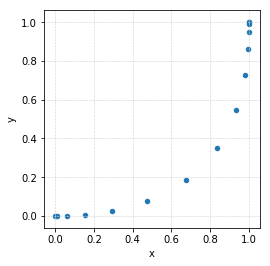

In [13]:
ax = df.plot.scatter('x', 'y')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)
ax.set_aspect('equal')

In [14]:
# pd.options.display.float_format = '{:,.2f}'.format
df['heading_deg'] = df['heading_rad'].apply(math.degrees)
df['velocity_normalized'] = df['velocity'] / df['velocity'].max()
df['forward'] = df['heading_rad'].apply(math.cos) * df['velocity_normalized']
df['strafe'] = -df['heading_rad'].apply(math.sin) * df['velocity_normalized']
df[['heading_deg', 'velocity', 'velocity_normalized', 'forward', 'strafe']]

,heading_deg,velocity,velocity_normalized,forward,strafe
time,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,-0.000000
50.0,0.341622,1.553710,0.100000,0.099998,-0.000596
100.0,1.773574,4.661130,0.300000,0.299856,-0.009285
150.0,4.973710,7.768550,0.500000,0.498117,-0.043349
200.0,10.785047,10.875970,0.700000,0.687635,-0.130987
250.0,20.920602,13.983390,0.900000,0.840669,-0.321367
300.0,36.876294,15.537100,1.000000,0.799933,-0.600089
350.0,55.653579,15.312346,0.985534,0.556034,-0.813698
400.0,70.734521,13.533882,0.871069,0.287405,-0.822289


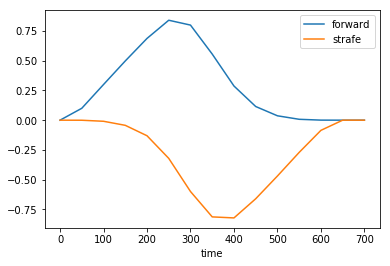

In [15]:

df.loc[:,['forward', 'strafe']].plot()

In [16]:
df

,x,y,position,velocity,acceleration,jerk,heading_rad,heading_deg,velocity_normalized,forward,strafe
time,,,,,,,,,,,
0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.000000
50.0,0.011819,0.000035,0.011839,1.553710,31.074200,6.214840e+02,0.005962,0.341622,0.100000,0.099998,-0.000596
100.0,0.059167,0.000902,0.059196,4.661130,62.148400,6.214840e+02,0.030955,1.773574,0.300000,0.299856,-0.009285
150.0,0.153709,0.006409,0.153911,7.768550,62.148400,0.000000e+00,0.086808,4.973710,0.500000,0.498117,-0.043349
200.0,0.294416,0.025603,0.295982,10.875970,62.148400,-2.331177e-13,0.188235,10.785047,0.700000,0.687635,-0.130987
250.0,0.476627,0.076483,0.485410,13.983390,62.148400,6.993531e-13,0.365133,20.920602,0.900000,0.840669,-0.321367
300.0,0.673534,0.183722,0.710356,15.537100,31.074200,-6.214840e+02,0.643613,36.876294,1.000000,0.799933,-0.600089
350.0,0.835210,0.352903,0.945429,15.312346,-4.495083,-7.113857e+02,0.971338,55.653579,0.985534,0.556034,-0.813698
400.0,0.932922,0.549088,1.165237,13.533882,-35.569283,-6.214840e+02,1.234550,70.734521,0.871069,0.287405,-0.822289


In [17]:
degrees = 41
waypoints = [
    {"x": 0, "y": 0, "degrees": degrees},
    {"x": math.cos(math.radians(degrees)), "y": math.sin(math.radians(degrees)), "degrees": degrees},
]

In [18]:
motion_input = {"pathfinder":{"dt":dt, "v_max": v_max, "a_max": a_max, "j_max": j_max, "waypoints": waypoints}}
process = subprocess.run("MOTION_OPTS=-Djava.library.path=../build/install/motion/lib ../build/install/motion/bin/motion '{}'".format(json.dumps(motion_input)), shell=True)
df = pd.read_csv("trajectory.csv", index_col="time")

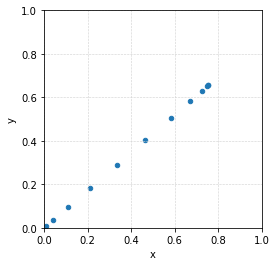

In [19]:
ax = df.plot.scatter('x', 'y')
plt.grid(True, color='lightgray', linestyle='--', linewidth=0.6)
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_aspect('equal')

In [20]:
df['heading_deg'] = df['heading_rad'].apply(math.degrees)
df['velocity_normalized'] = df['velocity'] / df['velocity'].max()
df['forward'] = df['heading_rad'].apply(math.cos) * df['velocity_normalized']
df['strafe'] = -df['heading_rad'].apply(math.sin) * df['velocity_normalized']
df[['heading_deg', 'velocity', 'velocity_normalized', 'forward', 'strafe']]

,heading_deg,velocity,velocity_normalized,forward,strafe
time,,,,,
0.0,0.0,0.000000,0.000000,0.000000,-0.000000
50.0,41.0,1.454959,0.125000,0.094339,-0.082007
100.0,41.0,4.364877,0.375000,0.283016,-0.246022
150.0,41.0,7.274795,0.625000,0.471693,-0.410037
200.0,41.0,10.184713,0.875000,0.660371,-0.574052
250.0,41.0,11.639672,1.000000,0.754710,-0.656059
300.0,41.0,11.112100,0.954675,0.720502,-0.626323
350.0,41.0,9.129569,0.784349,0.591956,-0.514579
400.0,41.0,6.219651,0.534349,0.403279,-0.350565
